# Task desifinition

1. Train 4 different classifiers using sklearn library to predict "Activity" (biological response of the molecule) field from the "bioresponse.csv" dataset:

 - small decision tree; 

 - deep decision tree; 

 - random forest on small trees;

 - random forest on deep trees;


2. Calculate the following metrics to check the quality of your models:

 - precision; 

 - recall; 

 - accuracy;

 - F1-score;
 
 - log-loss;
 
 
3. Plot precision-recall and ROC curves for your models.

4. Train a classifier who avoids Type II (False Negative) errors and calculate metrics  from p.2 for it.



# Comparing classifier algorithms

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [180]:
from sklearn.metrics import (accuracy_score, average_precision_score,f1_score, recall_score,
                        log_loss, precision_recall_curve, roc_auc_score,  roc_curve)

### Load data

In [181]:
data = pd.read_csv("Task #1/bioresponse.csv")
data.head(10)

Activity        D1        D2    D3    D4        D5        D6        D7  \
0         1  0.000000  0.497009  0.10  0.00  0.132956  0.678031  0.273166   
1         1  0.366667  0.606291  0.05  0.00  0.111209  0.803455  0.106105   
2         1  0.033300  0.480124  0.00  0.00  0.209791  0.610350  0.356453   
3         1  0.000000  0.538825  0.00  0.50  0.196344  0.724230  0.235606   
4         0  0.100000  0.517794  0.00  0.00  0.494734  0.781422  0.154361   
5         0  0.133333  0.771035  0.20  0.25  0.122153  0.677398  0.267224   
6         1  0.066700  0.567401  0.10  0.00  0.116578  0.689802  0.274886   
7         1  0.133333  0.610057  0.15  0.00  0.105176  0.759602  0.313393   
8         1  0.000000  0.776816  0.05  0.00  0.458446  0.738631  0.246347   
9         0  0.100000  0.768150  0.10  0.25  0.262299  0.598972  0.377065   

         D8        D9  ...    D1767  D1768  D1769  D1770  D1771  D1772  D1773  \
0  0.585445  0.743663  ...        0      0      0      0      0      0      0   
1  0.411754  0.836582  ...        1      1      1      1      0      1      0   
2  0.517720  0.679051  ...        0      0      0      0      0      0      0   
3  0.288764  0.805110  ...        0      0      0      0      0      0      0   
4  0.303809  0.812646  ...        0      0      0      0      0      0      0   
5  0.611112  0.701421  ...        0      0      0      0      0      0      0   
6  0.548509  0.785429  ...        0      0      0      0      0      0      0   
7  0.491790  0.756010  ...        0      0      1      0      1      0      0   
8  0.067800  0.751861  ...        0      0      0      0      0      0      0   
9  0.394514  0.673797  ...        0      0      0      0      0      0      0   

   D1774  D1775  D1776  
0      0      0      0  
1      0      1      0  
2      0      0      0  
3      0      0      0  
4      0      0      0  
5      0      0      0  
6      0      0      0  
7      0      0      0  
8      0      0      0  
9      0      0      0  

[10 rows x 1777 columns]

In [182]:
data_val = data.values

In [183]:
y = data_val[:,0]
X = data_val[:,1:]

In [184]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

_______________________

### Additional methods

In [185]:
def evaluation(y_test, y_pred):
    print("Accuracy = ", end = "")
    print(accuracy_score(y_test, y_pred, normalize=True))
    print("Precision = ", end = "") #TP
    print(average_precision_score(y_test, y_pred))
    print("F1-score = ", end = "")
    print(f1_score(y_test, y_pred))
    print("Recall_score = ", end = "")# TN
    print(recall_score(y_test, y_pred))
    print("Log_loss = ", end = "")
    print(log_loss(y_test, y_pred))

In [186]:
def plot_roc_cur(fper, tper, value): 
   
    plt.plot(fper, tper, color='orange', label='ROC = %.2f'%value)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    #plt.show()
    plt.grid()
    
def prec_recall_cur(y_test, y_proba):
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
    plt.plot(thresholds, precision[:-1], label = "Precision")
    plt.plot(thresholds, recall[:-1],  label = "Recall")
    plt.title("Precision-Recall curves ")
    plt.xlabel("Threshold")
    plt.ylabel("Value")
    plt.legend()
    plt.grid()
    
def plot_data(estimator, X_test, y_test):
    probs = estimator.predict_proba(X_test)  
    probs = probs[:, 1]  
    auc_score = roc_auc_score(y_test, probs)
    fper, tper, thresholds = roc_curve(y_test, probs)
    
    plt.figure(figsize = (13,5))
    plt.subplot(1,2,1)
    plot_roc_cur(fper, tper, value = auc_score)
    plt.subplot(1,2,2)
    prec_recall_cur(y_test, probs)
    plt.show()

___________________

## I Desidion tree 

In [187]:
from sklearn.tree import DecisionTreeClassifier

### I.I - Small tree

In [188]:
clf_small = DecisionTreeClassifier(random_state=0, max_depth = 3)

In [189]:
clf_small.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [190]:
y_pred = clf_small.predict(X_test)
y_pred_train = clf_small.predict(X_train)

##### Evaluation of small tree estimator

Accuracy = 0.7673179396092362
Precision = 0.7406441409232061
F1-score = 0.795631825273011
Recall_score = 0.8082408874801902
Log_loss = 8.036653782152982


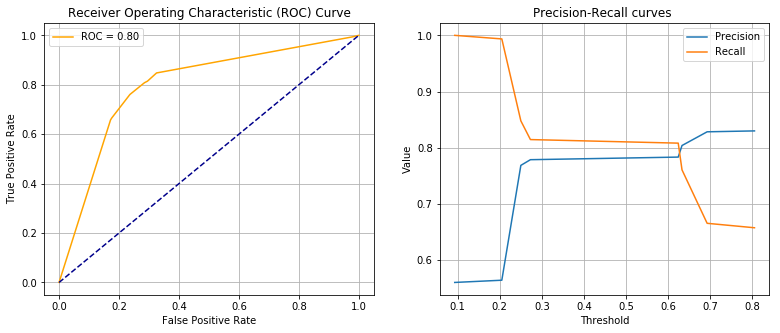

In [191]:
evaluation(y_test, y_pred)
plot_data(clf_small, X_test, y_test)

Text(0.5,1,'Conf-matrix')

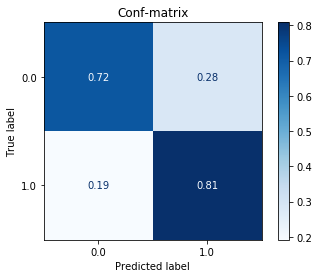

In [192]:
plot_confusion_matrix(clf_small, X_test,y_test,normalize='true',  cmap=plt.cm.Blues,)
plt.title("Conf-matrix")

### I.II - Small tree

In [193]:
clf_deep = DecisionTreeClassifier(random_state=0, max_depth = 20)

In [194]:
clf_deep.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [195]:
y_pred = clf_deep.predict(X_test)

##### Evaluation of deep tree estimator

In [196]:
evaluation(y_test, y_pred)
plot_data(clf_deep, X_test, y_test)

Accuracy = 0.6953818827708703
Precision = 0.6814346395385824
F1-score = 0.7301337529504327
Recall_score = 0.7353407290015848
Log_loss = 10.521262018296696


Text(0.5,1,'Conf-matrix')

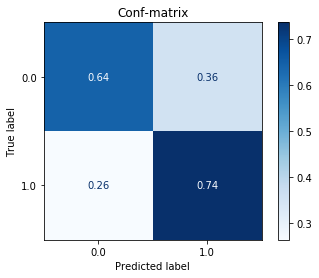

In [197]:
plot_confusion_matrix(clf_deep, X_test,y_test,normalize='true',  cmap=plt.cm.Blues,)
plt.title("Conf-matrix")

_______________

## II - RandomForest

In [198]:
from sklearn.ensemble import RandomForestClassifier

###  II.I - Small trees

In [199]:
clf_small = RandomForestClassifier(max_depth=3, random_state=0)

In [200]:
clf_small.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [201]:
y_pred = clf_small.predict(X_test)

##### Evaluation of RF with small tree estimator

Accuracy = 0.7442273534635879
Precision = 0.7238779629307108
F1-score = 0.7714285714285714
Recall_score = 0.7702060221870047
Log_loss = 8.834175794109054


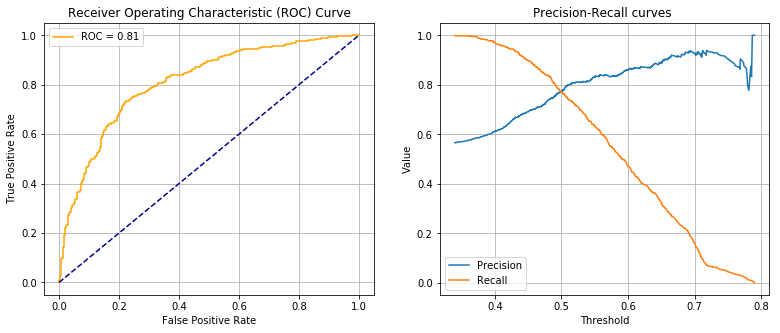

In [202]:
evaluation(y_test, y_pred)
plot_data(clf_small, X_test, y_test)

Text(0.5,1,'Conf-matrix')

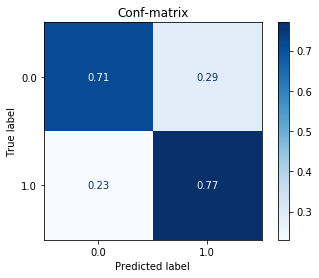

In [203]:
plot_confusion_matrix(clf_small, X_test,y_test,normalize='true',  cmap=plt.cm.Blues,)
plt.title("Conf-matrix")

###  II.II- Deep trees

In [204]:
clf_deep = RandomForestClassifier(max_depth=20, random_state=0)

In [205]:
clf_deep.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [206]:
y_pred = clf_deep.predict(X_test)

##### Evaluation of RF with deep tree estimator

Accuracy = 0.7948490230905861
Precision = 0.7714565213798155
F1-score = 0.8159362549800797
Recall_score = 0.8114104595879557
Log_loss = 7.085743252341519


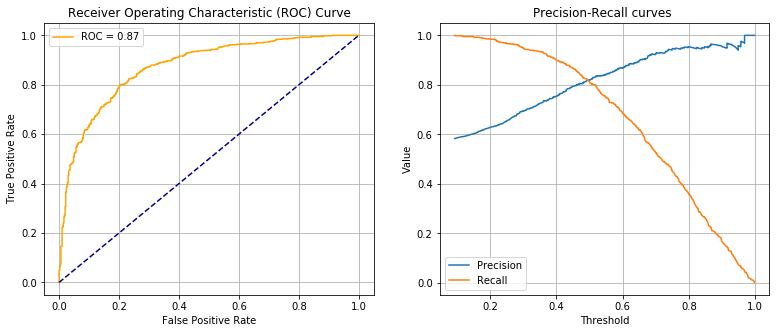

In [207]:
evaluation(y_test, y_pred)
plot_data(clf_deep, X_test, y_test)

Text(0.5,1,'Conf-matrix')

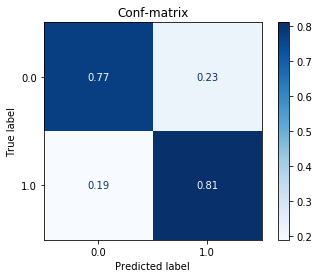

In [208]:
plot_confusion_matrix(clf_deep, X_test,y_test,normalize='true',  cmap=plt.cm.Blues,)
plt.title("Conf-matrix")

##  III- Avoid FN prediction 

In [229]:
clf = RandomForestClassifier(max_depth=20, class_weight={0: 1, 1: 12}, random_state=0)
clf = clf.fit(X_train, y_train)

In [230]:
y_pred = clf.predict(X_test)

##### Evaluation of RF with FN prediction avoiding

Accuracy = 0.6873889875666075
Precision = 0.6492083830349752
F1-score = 0.7693315858453474
Recall_score = 0.93026941362916
Log_loss = 10.797420574615508


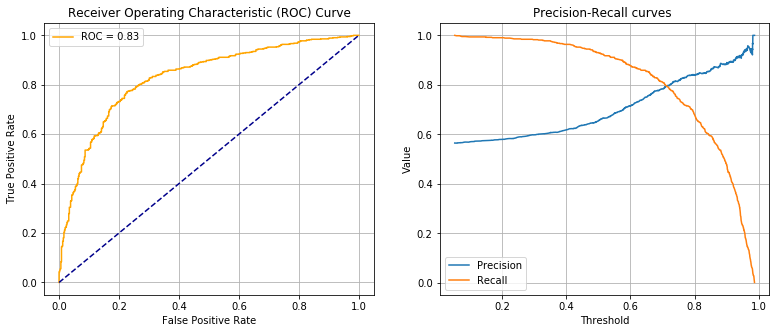

In [231]:
evaluation(y_test, y_pred)
plot_data(clf, X_test, y_test)

In [232]:
plot_confusion_matrix(clf, X_test,y_test,normalize='true',  cmap=plt.cm.Blues,)
plt.title("Conf-matrix")

Text(0.5,1,'Conf-matrix')